In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from nfdr2.util import *
import nfdr2.prim_fdr as pf
import nfdr2.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
## loading GTEx 
p,x,n_full,cate_name = dl.load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=dl.bh(p,alpha=0.1,n_full=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=dl.storey_bh(p,alpha=0.1,n_full=n_full,lamb=0.995,verbose=True)


## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[13.7358  0.0896  0.112  16.    ]
# p=0.00254028, x=[13.7461  0.0896  0.     16.    ]
# p=0.000610689, x=[13.7478  0.0896  0.     16.    ]
# p=0.00071358, x=[13.7479  0.0896  0.012  16.    ]
# p=0.000228687, x=[13.7482  0.0896  0.209  13.    ]


## bh testing summary ##
# n_rej = 29348
# t_rej = 0.000276


## pi0_hat=0.975
## sbh summary ##
# n_rej = 29689
# t_rej = 0.000286
# pi_0 estimate = 0.975




In [109]:
np.random.seed(0)
if len(x.shape) == 1: 
        x = x.reshape([-1,1])
n_sample,d = x.shape

## random split the fold
n_sub = int(n_sample/2)
rand_idx = np.random.permutation(n_sample)
n_full = int(n_full/2)

fold_idx = np.zeros([n_sample],dtype=int)
fold_idx[rand_idx[0:n_sub]] = 0
fold_idx[rand_idx[n_sub:]] = 1

p1,x1 = p[fold_idx==0],x[fold_idx==0]
p2,x2 = p[fold_idx==1],x[fold_idx==1]


In [112]:
for i in range(d):
    temp_x = np.concatenate([x1[:,i],x2[:,i]])
    feature_type = pf.get_feature_type(temp_x)
    if feature_type == 'discrete':
        x_val = np.sort(np.unique(temp_x))           
        x_order = pf.get_order_discrete(x1[:,i],p1,x_val,n_full=n_full)
        x1[:,i] = pf.reorder_discrete(x1[:,i],x_val,x_order)
        x2[:,i] = pf.reorder_discrete(x2[:,i],x_val,x_order)           


In [113]:
x = np.concatenate([x1,x2],axis=0)

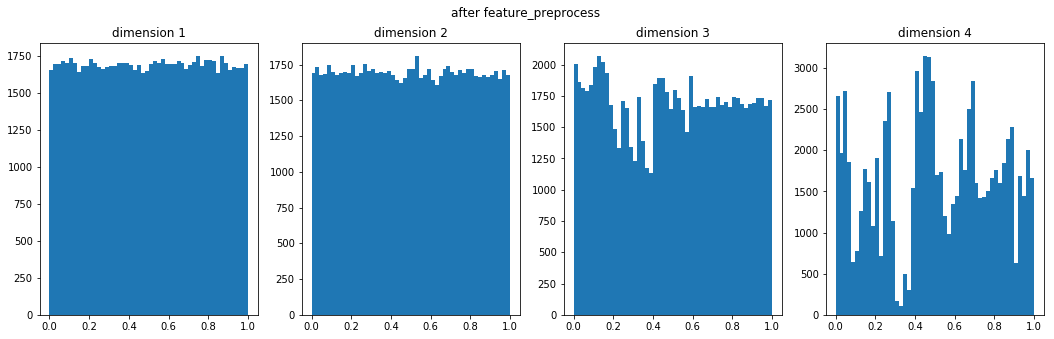

In [119]:
plt.figure(figsize=[18,5])
plt.suptitle('after feature_preprocess')
plot_x(x[0:x1.shape[0],:],vis_dim=None) 
plt.show()

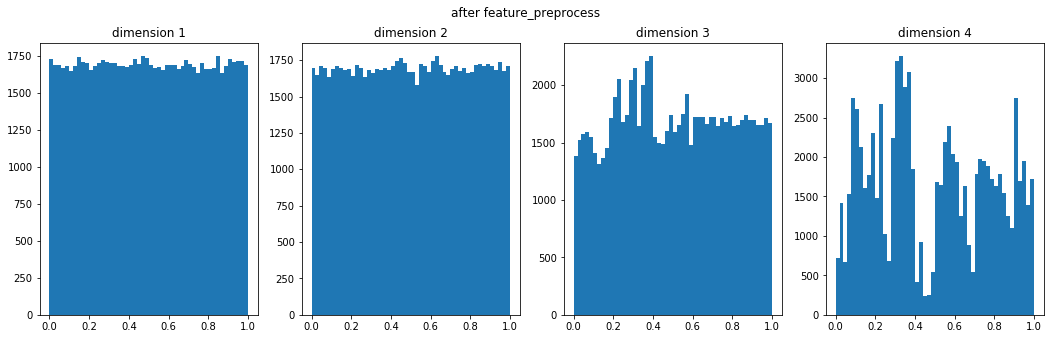

In [121]:
plt.figure(figsize=[18,5])
plt.suptitle('after feature_preprocess')
plot_x(x[x1.shape[0]:,:],vis_dim=None) 
plt.show()

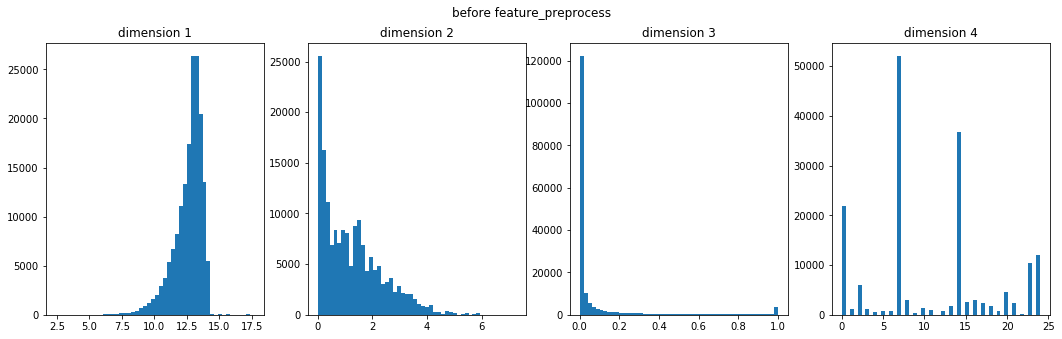

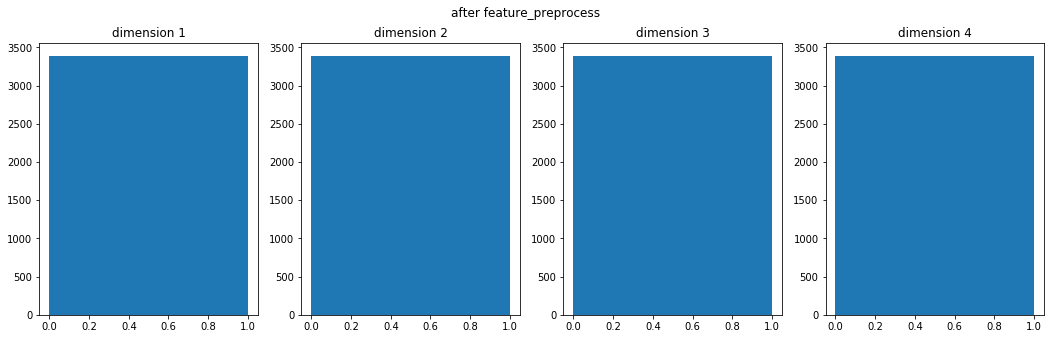

In [118]:
x = pf.feature_preprocess(x,verbose=True)

In [85]:
x_val = np.sort(np.unique(x[:,3]))
x_new,x_order_new = pf.reorder_discrete_feature(x[:,3],p,x_val,n_full=n_full)
_,x_order_new0 = pf.reorder_discrete_feature(x0[:,3],p0,x_val,n_full=n_full)
_,x_order_new1 = pf.reorder_discrete_feature(x1[:,3],p1,x_val,n_full=n_full)

In [87]:
x_val = np.sort(np.unique(x[:,3]))
x_order = pf.get_order_discrete(x[:,3],p,x_val,n_full=n_full)
x_new_beta = pf.reorder_discrete(x[:,3],x_val,x_order)

In [77]:
for i,val in enumerate(x_order_new):
    i_x_val = np.where(x_val==val)[0]
    if p_null[i_x_val]>0.02:
        print(val,np.sum(p_null[i_x_val]))

22 0.15776071607700914
20 0.04245919981480767
19 0.330221073343879
15 0.203518654269069
12 0.021470735753694202
6 0.048265750993479684
5 0.05345499440564837


In [78]:
for i,val in enumerate(x_order_new0):
    i_x_val = np.where(x_val==val)[0]
    if p_null0[i_x_val]>0.02:
        print(val,np.sum(p_null0[i_x_val]))

22 0.1592299945774266
20 0.04171508250058099
19 0.3309319079711829
15 0.200557750406693
12 0.02246494693624603
6 0.04655666589201332
5 0.05383840731272756


In [79]:
for i,val in enumerate(x_order_new1):
    i_x_val = np.where(x_val==val)[0]
    if p_null1[i_x_val]>0.02:
        print(val,np.sum(p_null1[i_x_val]))

22 0.15619120752543675
20 0.04319447110769822
19 0.32923785755423307
15 0.20629679401036669
12 0.02050297561912075
6 0.04995200614321367
5 0.05306200806296794


In [70]:
x_val = np.sort(np.unique(x[:,3]))
x_order = pf.get_order_discrete(x,p,x_val,n_full=n_full)

In [71]:
x_order

array([22, 20,  9,  7,  3, 19, 11,  0, 10,  4, 21, 14,  1,  8, 15, 18, 24,
        2, 16, 23, 13, 12,  6, 17,  5])

In [73]:
np.array(x_order_new)

array([22, 20,  9,  7,  3, 19, 11, 10,  4,  1, 21, 14,  8, 15, 18, 24,  2,
       16, 23,  0, 13, 12,  6, 17,  5])